# Reuters dataset
Reuters dataset is a set of short newswires with 46 different topics widely used for text classification and was published by Reuters in 1986. The dataset has some topics more represented than others

# loading the needed packages

In [1]:
from keras.datasets import reuters
import keras
import nltk
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


loading the reuters dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

C:\Anaconda3\lib\site-packages\keras\datasets\reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\lib\site-packages\keras\datasets\reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print('shape of the training set'+str(train_data.shape))
print('shape of the testing set'+str(test_data.shape))

shape of the training set(8982,)
shape of the testing set(2246,)


each observation is a list of integers with 1 representing the most frequent occuring word, 2 the second most frequent occuring word and in that order

In [4]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


getting the word index that is getting the words for which each integer in the data set represent. This is a dictionary, mapping each word to their respective integer (word:integer)

In [5]:
words_index = reuters.get_word_index()

reversing word$\textbf{:}$integer to integer$\textbf{:}$word

In [6]:
index_to_words = {integer+3:word for word, integer in words_index.items()}
index_to_words[0]='PAD'
index_to_words[1]='START'
index_to_words[2]='UNKNOWN'

In [7]:
index_to_words.get(9),index_to_words.get(0)

('and', 'PAD')

### joining the words in the first observation (review) in order to view the first review as a sentence

In [8]:
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([index_to_words.get(i) for i in train_data[50]])

In [9]:
decoded_newswire

"START warner communications inc said its warner communications investors inc unit acquired stock and warrants representing 416 668 shares of berkey inc common stock or the equivalent of 8 2 pct of the company's common stock outstanding in a filing with the securities and exchange commission warner communications investors said it paid about one mln dlrs to berkey on september 23 to acquire 104 167 shares of berkey series b convertible preferred stock the preferred stock is convertible into 208 334 berkey common shares and warrants to buy another 208 334 shares warner communications and its subsidiary said the berkey stock is held as an investment which they will review and evaluate from time to time reuter 3"

In [10]:
max([max(seq) for seq in train_data])

9999

In [11]:
train_labels[0:80]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16,  3,  3,  4,  4, 19,  8, 16,
        3,  3, 21, 11,  4,  4,  3,  3,  1,  3,  1,  3, 16,  1,  4, 13, 20,
        1,  4,  4, 11,  3,  3,  3, 11, 16,  4,  4, 20, 18, 25, 19,  3,  4,
        3,  4,  3,  4,  3,  3,  4,  4,  3,  4,  4,  3, 19, 35,  8,  4,  4,
        3, 16, 25,  3, 11,  3,  9, 16, 38, 10,  4,  4], dtype=int64)

<h2>the various categories (classes) for the  labels</h2>

In [12]:
names_categories = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply','coffee','sugar',
                    'trade','reserves','ship','cotton','carcass','crude','nat-gas','cpi','money-fx','interest','gnp',
                    'meal-feed','alum','oilseed','gold','tin','strategic-metal','livestock','retail','ipi','iron-steel',
                    'rubber','heat','jobs','lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

## total number of documents classified under each category

In [13]:
train_count=collections.Counter(train_labels)
print(train_count)

Counter({3: 3159, 4: 1949, 19: 549, 16: 444, 1: 432, 11: 390, 20: 269, 13: 172, 8: 139, 10: 124, 9: 101, 21: 100, 25: 92, 2: 74, 18: 66, 24: 62, 0: 55, 34: 50, 12: 49, 36: 49, 28: 48, 6: 48, 30: 45, 23: 41, 31: 39, 17: 39, 40: 36, 32: 32, 41: 30, 14: 26, 26: 24, 39: 24, 43: 21, 15: 20, 38: 19, 37: 19, 29: 19, 45: 18, 5: 17, 7: 16, 27: 15, 22: 15, 42: 13, 44: 12, 33: 11, 35: 10})


In [14]:
mapping=dict([(names_categories[i],train_count[i]) for i in range(46)])
print(mapping)

{'cocoa': 55, 'grain': 432, 'veg-oil': 74, 'earn': 3159, 'acq': 1949, 'wheat': 17, 'copper': 48, 'housing': 16, 'money-supply': 139, 'coffee': 101, 'sugar': 124, 'trade': 390, 'reserves': 49, 'ship': 172, 'cotton': 26, 'carcass': 20, 'crude': 444, 'nat-gas': 39, 'cpi': 66, 'money-fx': 549, 'interest': 269, 'gnp': 100, 'meal-feed': 15, 'alum': 41, 'oilseed': 62, 'gold': 92, 'tin': 24, 'strategic-metal': 15, 'livestock': 48, 'retail': 19, 'ipi': 45, 'iron-steel': 39, 'rubber': 32, 'heat': 11, 'jobs': 50, 'lei': 10, 'bop': 49, 'zinc': 19, 'orange': 19, 'pet-chem': 24, 'dlr': 36, 'gas': 30, 'silver': 13, 'wpi': 21, 'hog': 12, 'lead': 18}


In [15]:
labels_count=pd.DataFrame(mapping.items(),columns=['class_name','total_num_of_each_topic_in_docs'])

In [25]:
print(labels_count.sort_values(by='total_num_of_each_topic_in_docs'))

         class_name  total_num_of_each_topic_in_docs
35              lei                               10
33             heat                               11
44              hog                               12
42           silver                               13
22        meal-feed                               15
27  strategic-metal                               15
7           housing                               16
5             wheat                               17
45             lead                               18
29           retail                               19
38           orange                               19
37             zinc                               19
15          carcass                               20
43              wpi                               21
26              tin                               24
39         pet-chem                               24
14           cotton                               26
41              gas                           

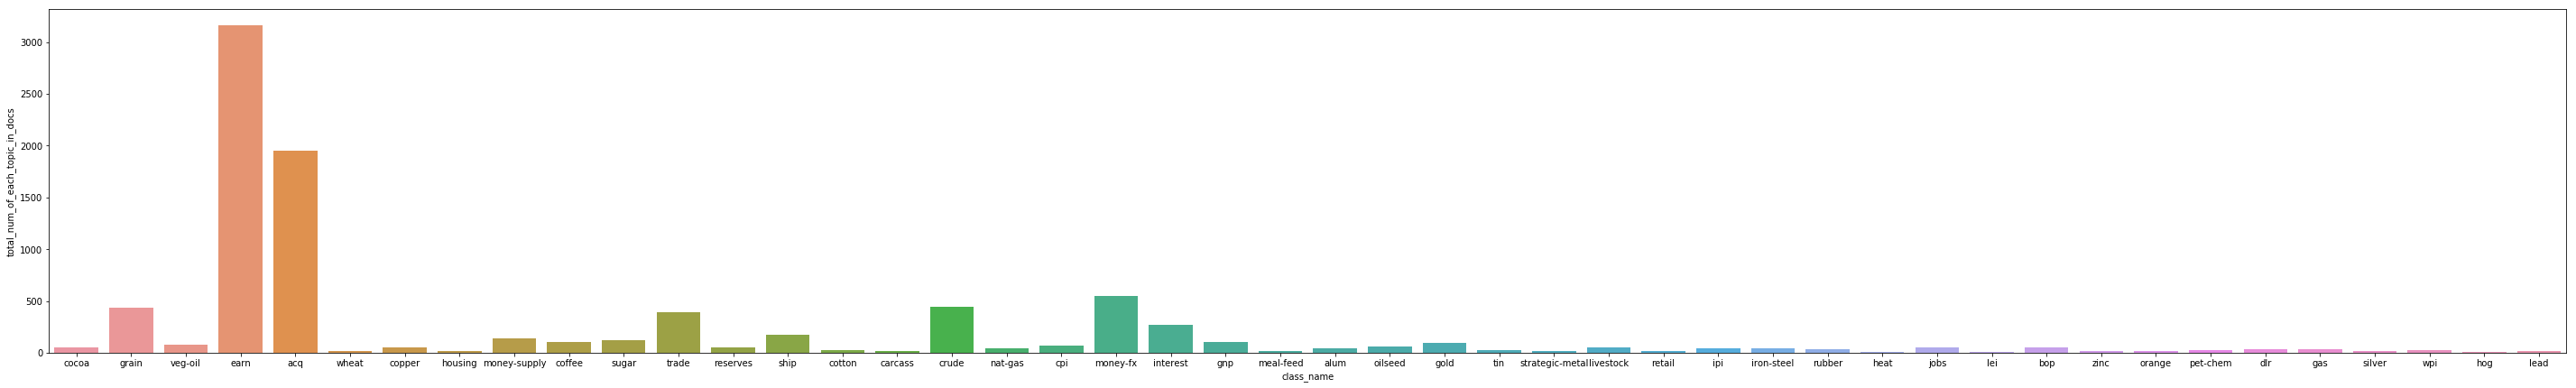

In [20]:
plt.figure(figsize=(50,7))
sns.barplot(x='class_name',y='total_num_of_each_topic_in_docs',data=labels_count)

In [18]:
freq_distribution=nltk.FreqDist(train_count)
freq_distribution

FreqDist({3: 3159, 4: 1949, 19: 549, 16: 444, 1: 432, 11: 390, 20: 269, 13: 172, 8: 139, 10: 124, ...})

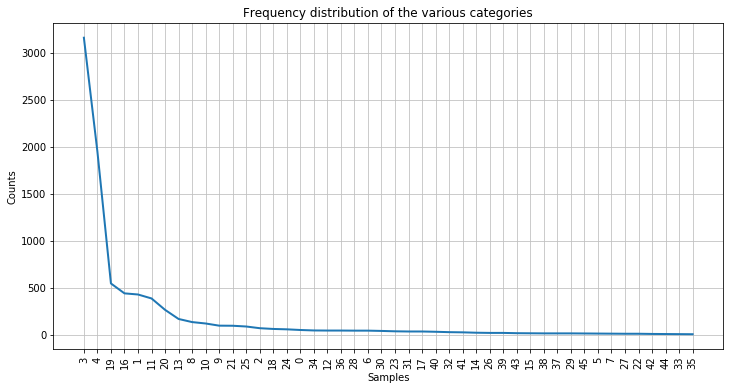

In [19]:
plt.figure(figsize=(12,6))
freq_distribution.plot(title='Frequency distribution of the various categories')

In [20]:
def vectorize_sequences(sequences,dim=10000):
    result=np.zeros((len(sequences),dim))
    for i,seq in enumerate(sequences):
        result[i,seq]=1
    return result

In [21]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

# vectorizing the labels using one hot encoding

In [23]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [24]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [25]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## using keras builtin function

In [26]:
from keras.utils import to_categorical

In [27]:
one_hot_labels=to_categorical(train_labels)

In [28]:
one_hot_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# building our model

In [29]:
def network(input_dim):
    net=keras.models.Sequential()
    net.add(keras.layers.Dense(52,activation='relu',input_shape=(input_dim,)))
    net.add(keras.layers.Dense(30,activation='relu'))
    net.add(keras.layers.Dropout(rate=0.001))
    net.add(keras.layers.Dense(46,activation='softmax'))
    net.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return net

model=network(input_dim=10000)

In [30]:
x_val = x_train[:1000]
x_training = x_train[1000:]
y_val = one_hot_train_labels[:1000]
y_training = one_hot_train_labels[1000:]

In [31]:
x_val.shape,x_training.shape

((1000, 10000), (7982, 10000))

training the model

In [32]:
history=model.fit(x=x_training,y=y_training,batch_size=500,epochs=13,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/13
7982/7982 [==============================] - 4s 550us/step - loss: 3.0552 - accuracy: 0.4460 - val_loss: 2.2559 - val_accuracy: 0.6050
Epoch 2/13
7982/7982 [==============================] - 2s 271us/step - loss: 1.8220 - accuracy: 0.6642 - val_loss: 1.5770 - val_accuracy: 0.6800
Epoch 3/13
7982/7982 [==============================] - 2s 209us/step - loss: 1.3027 - accuracy: 0.7360 - val_loss: 1.3115 - val_accuracy: 0.7230
Epoch 4/13
7982/7982 [==============================] - 2s 205us/step - loss: 1.0452 - accuracy: 0.7839 - val_loss: 1.1840 - val_accuracy: 0.7370
Epoch 5/13
7982/7982 [==============================] - 2s 215us/step - loss: 0.8649 - accuracy: 0.8153 - val_loss: 1.0915 - val_accuracy: 0.7650
Epoch 6/13
7982/7982 [==============================] - 2s 229us/step - loss: 0.7190 - accuracy: 0.8459 - val_loss: 1.0233 - val_accuracy: 0.7760
Epoch 7/13
7982/7982 [==============================] - 2s 214us/step - loss

In [33]:
loss,acc = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 576us/step


In [34]:
acc

0.7858415246009827

In [35]:
loss

1.0286675380577706